## Measuring the Stroop Effect with a dependent sample t-test.

The Stroop Test as Presented by Udacity's Data Analyst Program:

In a Stroop task, participants are presented with a list of words, with each word displayed in a color of ink. The participant’s task is to say out loud the color of the ink in which the word is printed. The task has two conditions: a congruent words condition, and an incongruent words condition. In the congruent words condition, the words being displayed are color words whose names match the colors in which they are printed: for example <span style="color: red">RED</span>, <span style="color:blue">BLUE</span>. In the incongruent words condition, the words displayed are color words whose names do not match the colors in which they are printed: for example <span style="color:green">PURPLE</span>, <span style="color:blue">ORANGE</span>. In each case, we measure the time it takes to name the ink colors in equally-sized lists. Each participant will go through and record a time from each condition.

The dependent variable is the `time it takes to name the ink colors on equally sized lists` in seconds.

The independent variable is the `color of the ink`, which is either congruent with the words on the list, or incongruent.

The controls in the experiement are the size of the lists, and the subjects of the experiment. Since this is a before and after style experiement, where the same subjects measured against a base condition (words congruent with ink color), and a treated condition (words that are incongruent with ink color)...


My results for the test are as follows:

Congruent words: ~15 seconds.
Incongruent words: ~35 seconds.

### Hypothesis:

Let $\mu_c$ be equal to the population mean time to identify colors when the words are congruent.

Let $\mu_i$ be equal to the population mean time time to identify colors when the words are incongruent.

$H_0 : (\mu_c = \mu_i)$ The null hypothesis is that the population mean time in seconds to name the ink colors for the congruent set will be equal to population mean time for the congruent set. 

$H_A: (\mu_i > \mu_c)$ The alternate hypothesis is that the population mean time in seconds to name the ink colors for the incongruent set will be longer than the population mean time to for the congruent set.


In order to test this hypothesis I will use a dependent sample t-test. This would be the best measure for this type of experiment for the following reasons:

* The dataset is the result of a repeated measures[^1] experiment, where the same population is measured before and after a treatment[^2].

* We have a sample size of less than 30[^3].

* The population standard deviation is unknown, and we are estimating based on our sample[^3].


Since our hypothesis is that the the incongruent $\mu_i $ will be $\mu_c$, we will do a one tailed measurement, and we will use an alpha level of .05 to determine whether or not any difference measured is statistically significant:

$$\alpha = 0.5$$

The dependent sample t-test assumes a normal distribution of differences, and to roughly mirror the following:

![image](one-tail_with_alpha.png)

The dotted line represents the t-critical value, is determined by our alpha level and degrees of freedom, and if the our t-statistic falls within the shaded grey area, which is the critical region. When $\alpha = 0.5$, if our results fall within this critical region, we can state with 95% confidence that the result was not due to chance, and we will reject the null hypothesis. 

[^1]: https://en.wikipedia.org/wiki/Repeated_measures_design
[^2]: http://oak.ucc.nau.edu/rh232/courses/EPS525/Handouts/Understanding%20the%20Dependent%20t%20Test.pdf
[^3]: http://www.statisticshowto.com/when-to-use-a-t-score-vs-z-score/

In [2]:
import pandas as pd


In [3]:
path = r'~/code/udacity/project1/stroopdata.csv'

dataFrame = pd.read_csv(path)


The following plots were made with the Seaborn library's `distplot` [method](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html), which consists of a histogram overlaid by a [kde](https://en.wikipedia.org/wiki/Kernel_density_estimation) plot. The congruent group is estimated to be a more or less normal distribution, with a very slight negative skew. We can see the incongruent group also appears to be somewhat normal, but also includes an outlier.

When comparing the shape of the distribution of the congruent and incongruent samples, we can see that there is greater variability in the congruent sample as tht shape is broader and more spread out.

Populating the interactive namespace from numpy and matplotlib


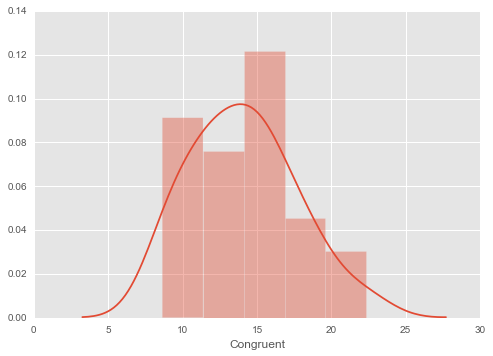

In [4]:
%pylab inline
pylab.rcParams['figure.figsize'] = (10.0, 8.0)
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
matplotlib.style.use('ggplot')
sns.distplot(dataFrame['Congruent'])


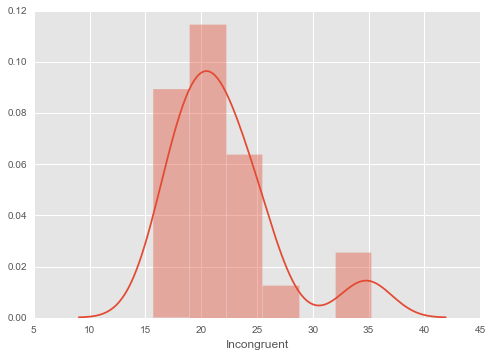

In [5]:
sns.distplot(dataFrame['Incongruent'])
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

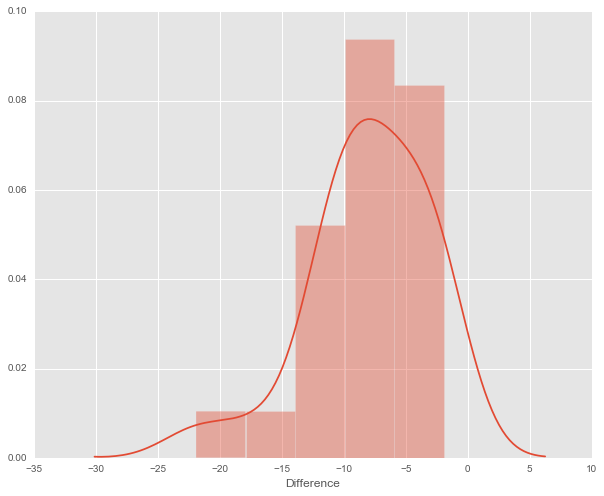

In [6]:
sns.distplot(dataFrame['Difference'])
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

In [ ]:

dataFrame.describe()

,Congruent,Incongruent,Difference
count,24.000000,24.000000,24.000000
mean,14.051125,22.015917,-7.964792
std,3.559358,4.797057,4.864827
min,8.630000,15.687000,-21.919000
25%,11.895250,18.716750,-10.258500
50%,14.356500,21.017500,-7.666500
75%,16.200750,24.051500,-3.645500
max,22.328000,35.255000,-1.950000


The distribution of differences is somewhat positively skewed, though the kde plot infers a perhaps normal distribution and based on information provided in the Udacity forums[^1] we will continue with that assumption, and then use the formula:

$$ t = \frac{\mu_c - \mu_i}{\frac{S}{\sqrt{n}}} $$

We have a mean difference ( $\mu_c$ (14.051125) - $\mu_i$ 22.015917) of -7.964792. We will use a dependent sample t-test to measure the effect of the Incongruent words/colors, and determine whether or not it is statistically significant. The standard deviation ($\sigma_d$) is `4.86`, which we will convert to the Standard Error of the Mean by dividing by $\sqrt{n}$ where `n` is our sample size, or 24. This final figure is `.99`. We can then find our `t-statistic` by dividing the mean difference (`-7.96`) by $SEM$ (`.99`), which yields -8.05.

When $df = 23$, the critical $t$ value is `1.714`[^2]. In this case we will use the inverse, `-1.714`, since we expect the incongruent mean to be *greater* than the incongruent mean. Our `t-statistic` is `-8.05`, which is significantly less than our critical $t$ value of `-1.714`. 

With this result, we will reject the null hypotheses, ($H_0$), and say that the means are different in a statistically significant way. We can interpret these results to mean that the time to identify the ink color is negatively affected by incongruency between the word and ink color. We can measure the strength of the relationship with the correlation coefficient:


$$r^2 = \frac{t^2}{t^2+df}$$

In this case $t$ refers to the the *t-statistic* and not the *t-value*, and yeilds: `0.738`.

With this result we can say that 73.8% of the time difference is related to the incongruency, and 26.2% is due to other factors. 

We can calculate the effect size by using Cohen's $d$:

$$ \frac{\mu_c - \mu_i}{\sigma_d} = \frac{-7.96}{4.86}$$

The effect size is -1.64, in other words, the means are -1.64 standard deviations apart. This can be visualized to some degree in the following plot:


[^1]:https://discussions.udacity.com/t/assumptions-of-a-paired-sample-t-test/36020/2
[^2]:http://www.sjsu.edu/faculty/gerstman/StatPrimer/t-table.pdf

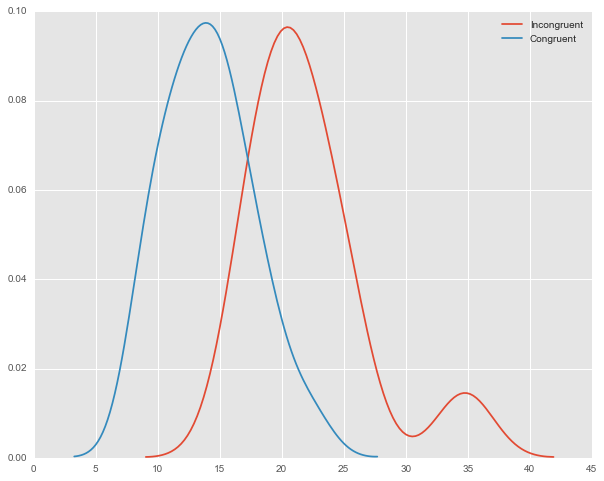

In [ ]:
sns.kdeplot(dataFrame['Incongruent'], label='Incongruent')
sns.kdeplot(dataFrame['Congruent'], label='Congruent')
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

An effect size of 1.64 indicates that the incongruent mean is at greater than the 94.5% percentile of the congruent group.[^1]

The reason for the difference in means might be explained by the mental effort it takes to parse the incongruency. If one's task is to identify an item's color that also has other congruent features. Even if a subject wasn't informed of the congruency, it would become pretty apparent. One might save mental effort by quickly noticing the congruency and reading/identifying colors. 

For the incongruent test, one actually has to parse the color from the word, and there is the effort involved in that work, paired with the noise caused by the incongruent color/word matches.

A way to test this would be to change the context of the incongruency. Instead of having words that matched or didn't match their colors, the congruency should be with the item. So items that are commonly identified with colors could be identified, for example: <span style="color: red">SKY</span>, <span style="color:maroon">TREE</span> vs <span style="color: yellow">SUN</span>, <span style="color:green">GRASS</span>


[^1]: http://www.uccs.edu/lbecker/effect-size.html